In [1]:
import numpy as np
import pandas as pd
import pickle

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import activations
from keras import metrics
import math

import random

from dataset import atti_dirigenti

# to make the experimens replicable
random.seed(123456)


Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /home/fabio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fabio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load the dataset

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = atti_dirigenti.load_data(num_words=10000, remove_stopwords=True)

In [3]:
label_index = atti_dirigenti.get_labels()
len(label_index)

In [6]:
label_index

{'01943': 0,
 'DIREZIONE GENERALE SVILUPPO ECONOMICO                 ': 1,
 '01946': 2,
 '01025': 3,
 'D.G. PRESIDENZA                                       ': 4,
 '01934': 5,
 'DIREZIONE GENERALE DIRITTO ALLA SALUTE E POLITICHE DI ': 6,
 'DIREZIONE GENERALE POLITICHE TERRITORIALI E AMBIENTALI': 7,
 '01937': 8,
 'D.G.  AVVOCATURA                                      ': 9,
 '01928': 10,
 'POLITICHE AMBIENTALI, ENERGIA E CAMBIAMENTI CLIMATICI': 11,
 'DIREZIONE ORGANIZZAZIONE E SISTEMI INFORMATIVI': 12,
 'DIREZIONE GENERALE BILANCIO E FINANZE                 ': 13,
 'DIREZIONE DIFESA DEL SUOLO E PROTEZIONE CIVILE': 14,
 'DIREZIONE GENERALE POLITICHE FORMATIVE, BENI E ATTIVIT': 15,
 "D.G. COMPETITIVITA' DEL SISTEMA REGIONALE E SVILUPPO D": 16,
 'DIREZIONE DIRITTI DI CITTADINANZA E COESIONE SOCIALE': 17,
 'DIREZIONE ISTRUZIONE E FORMAZIONE': 18,
 'DIREZIONE AGRICOLTURA E SVILUPPO RURALE': 19}

### Preparing Data

for data and labels

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype=np.float32)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
dimension = 11000

In [10]:
x_train = vectorize_sequences(x_train, dimension)
x_val = vectorize_sequences(x_val, dimension)
x_test = vectorize_sequences(x_test, dimension)

In [11]:
x_train[0:]

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]], dtype=float32)

In [12]:
x_train.shape

(99390, 11000)

One hot encoding for the labels

In [13]:
def to_one_hot(labels):
    results = np.zeros((len(labels), len(set(labels))), dtype=np.float16)
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [14]:
y_train = to_one_hot(y_train)
y_val = to_one_hot(y_val)
y_test = to_one_hot(y_test)

In [15]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float16)

## Build the Models

In [16]:
def build_model(neurons):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_shape=(x_train.shape[-1], )))
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(len(label_index), activation='softmax'))
    
    model.compile(optimizer=optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [18]:
model_small = build_model(16)
history_small = model_small.fit(x=x_train, y=y_train, validation_data=(x_val, y_val),
                   epochs=10, batch_size=256)

Train on 99390 samples, validate on 11044 samples
Epoch 1/10
99390/99390 [==============================] - 5s 46us/step - loss: 1.6200 - acc: 0.5281 - val_loss: 0.8202 - val_acc: 0.7410
Epoch 2/10
99390/99390 [==============================] - 2s 24us/step - loss: 0.6663 - acc: 0.7831 - val_loss: 0.6570 - val_acc: 0.7866
Epoch 3/10
99390/99390 [==============================] - 2s 23us/step - loss: 0.5237 - acc: 0.8241 - val_loss: 0.6210 - val_acc: 0.7972
Epoch 4/10
99390/99390 [==============================] - 2s 24us/step - loss: 0.4543 - acc: 0.8457 - val_loss: 0.6162 - val_acc: 0.8010
Epoch 5/10
99390/99390 [==============================] - 2s 23us/step - loss: 0.4091 - acc: 0.8599 - val_loss: 0.6186 - val_acc: 0.8032
Epoch 6/10
99390/99390 [==============================] - 2s 24us/step - loss: 0.3755 - acc: 0.8707 - val_loss: 0.6300 - val_acc: 0.8022
Epoch 7/10
99390/99390 [==============================] - 2s 23us/step - loss: 0.3489 - acc: 0.8793 - val_loss: 0.6418 - val_acc

In [19]:
model_medium = build_model(64)
history_medium = model_medium.fit(x=x_train, y=y_train, validation_data=(x_val, y_val),
                   epochs=10, batch_size=256)

Train on 99390 samples, validate on 11044 samples
Epoch 1/10
99390/99390 [==============================] - 4s 38us/step - loss: 1.0858 - acc: 0.6717 - val_loss: 0.6057 - val_acc: 0.7924
Epoch 2/10
99390/99390 [==============================] - 4s 35us/step - loss: 0.4710 - acc: 0.8375 - val_loss: 0.5388 - val_acc: 0.8164
Epoch 3/10
99390/99390 [==============================] - 4s 36us/step - loss: 0.3584 - acc: 0.8738 - val_loss: 0.5348 - val_acc: 0.8218
Epoch 4/10
99390/99390 [==============================] - 4s 36us/step - loss: 0.2944 - acc: 0.8953 - val_loss: 0.5624 - val_acc: 0.8214
Epoch 5/10
99390/99390 [==============================] - 4s 37us/step - loss: 0.2496 - acc: 0.9115 - val_loss: 0.5843 - val_acc: 0.8236
Epoch 6/10
99390/99390 [==============================] - 4s 36us/step - loss: 0.2132 - acc: 0.9245 - val_loss: 0.6319 - val_acc: 0.8191
Epoch 7/10
99390/99390 [==============================] - 4s 36us/step - loss: 0.1868 - acc: 0.9335 - val_loss: 0.6610 - val_acc

In [20]:
model_large = build_model(256)
history_large = model_large.fit(x=x_train, y=y_train, validation_data=(x_val, y_val),
                   epochs=10, batch_size=256)

Train on 99390 samples, validate on 11044 samples
Epoch 1/10
99390/99390 [==============================] - 6s 64us/step - loss: 0.8445 - acc: 0.7283 - val_loss: 0.5340 - val_acc: 0.8146
Epoch 2/10
99390/99390 [==============================] - 6s 62us/step - loss: 0.3752 - acc: 0.8661 - val_loss: 0.5142 - val_acc: 0.8247
Epoch 3/10
99390/99390 [==============================] - 6s 62us/step - loss: 0.2457 - acc: 0.9117 - val_loss: 0.5309 - val_acc: 0.8341
Epoch 4/10
99390/99390 [==============================] - 6s 62us/step - loss: 0.1707 - acc: 0.9401 - val_loss: 0.5822 - val_acc: 0.8347
Epoch 5/10
99390/99390 [==============================] - 6s 62us/step - loss: 0.1260 - acc: 0.9563 - val_loss: 0.6361 - val_acc: 0.8366
Epoch 6/10
99390/99390 [==============================] - 6s 63us/step - loss: 0.0977 - acc: 0.9674 - val_loss: 0.6966 - val_acc: 0.8339
Epoch 7/10
99390/99390 [==============================] - 6s 62us/step - loss: 0.0810 - acc: 0.9727 - val_loss: 0.7304 - val_acc

### Printing The Loss

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
def chart_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b+', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.yticks(np.arange(0,2.25,0.25))
    plt.legend()
    plt.show()

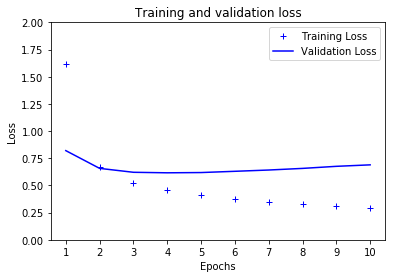

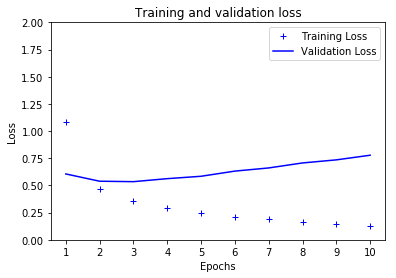

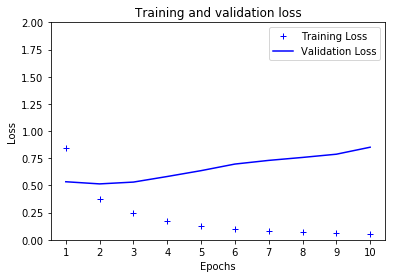

In [23]:
chart_loss(history_small)
chart_loss(history_medium)
chart_loss(history_large)

In [24]:
def chart_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b+', label='Training Acc')
    plt.plot(epochs, val_acc, 'b', label='Validation Acc')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuray')
    plt.xticks(epochs)
    plt.yticks(np.arange(0,1.1,0.1))
    plt.legend()
    plt.show()

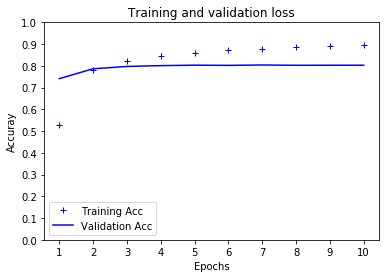

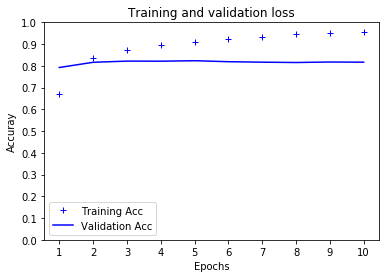

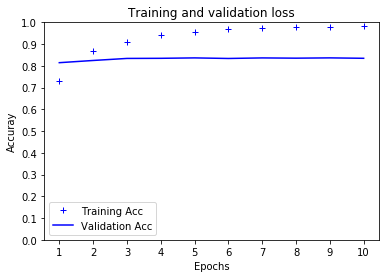

In [25]:
chart_acc(history_small)
chart_acc(history_medium)
chart_acc(history_large)

In [26]:
def compare_loss(histories):
    epochs = range(1, len(list(histories.values())[0].history['val_loss']) + 1)

    for i, history in histories.items():
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, label='Validation Loss {}'.format(i))
            
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

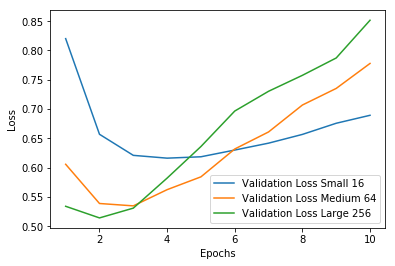

In [27]:
compare_loss({'Small 16': history_small, 'Medium 64': history_medium, 'Large 256': history_large})

In [28]:
def compare_accuracy(histories):
    epochs = range(1, len(list(histories.values())[0].history['val_acc']) + 1)

    for i, history in histories.items():
        val_loss = history.history['val_acc']
        plt.plot(epochs, val_loss, label='Validation Accuracy {}'.format(i))
            
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

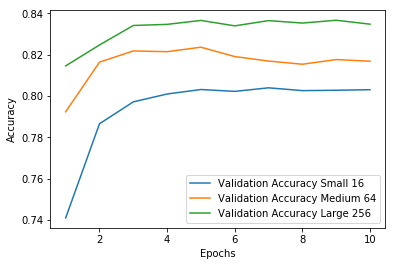

In [29]:
compare_accuracy({'Small 16': history_small, 'Medium 64': history_medium, 'Large 256': history_large})

In [30]:
def min_loss(history):
    val_loss = history.history['val_loss'] 
    return np.argmin(val_loss) + 1   

def accuracy(history, epoch):
    val_acc = history.history['val_acc']
    return val_acc[epoch-1]

In [31]:
print('min loss for model small is {}'.format(min_loss(history_small)))
print('min loss for model medium is {}'.format(min_loss(history_medium)))
print('min loss for model large is {}'.format(min_loss(history_large)))

min loss for model small is 4
min loss for model medium is 3
min loss for model large is 2


In [32]:
print('best validation accuracy for model small is {}'.format(
    accuracy(history_small, min_loss(history_small))))
print('best validation accuracy for model medium is {}'.format(
    accuracy(history_medium, min_loss(history_medium))))
print('best validation accuracy for model large is {}'.format(
    accuracy(history_medium, min_loss(history_medium))))

best validation accuracy for model small is 0.800977906641948
best validation accuracy for model medium is 0.8218036943568306
best validation accuracy for model large is 0.8218036943568306


### Evaluate on the Test Set

- train the best model for the best epochs

In [33]:
import gc

In [34]:
gc.collect()

8211

In [35]:
model = build_model(128)

In [36]:
history = model.fit(x=np.concatenate([x_train, x_val]), y=np.concatenate([y_train, y_val]), epochs=3, batch_size=256)

Epoch 1/3
110434/110434 [==============================] - 5s 46us/step - loss: 0.8814 - acc: 0.7209
Epoch 2/3
110434/110434 [==============================] - 5s 43us/step - loss: 0.4073 - acc: 0.8563
Epoch 3/3
110434/110434 [==============================] - 5s 43us/step - loss: 0.3017 - acc: 0.8905


In [37]:
loss, acc = model.evaluate(x_test, y_test)

27609/27609 [==============================] - 1s 47us/step


In [38]:
print('loss {}'.format(loss))
print('acc {}'.format(acc))

loss 0.5146225066168417
acc 0.8311420188982427
